# KAIROSA

## Some imports :)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("card_transdata.csv")
df['fraud'].unique()

array([0., 1.])

## Inspecting the data

In [3]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
df[df["fraud"] == 1.0]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
999908,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0,1.0
999916,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0,1.0
999919,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0,1.0
999939,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0,1.0


In [5]:
cols = list(df.columns[:-1])
print(cols)

['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']


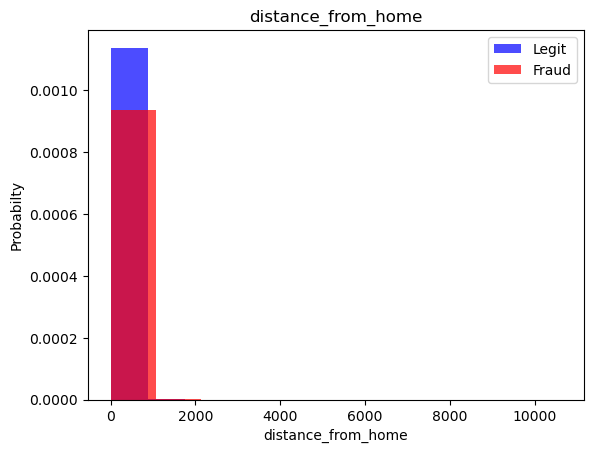

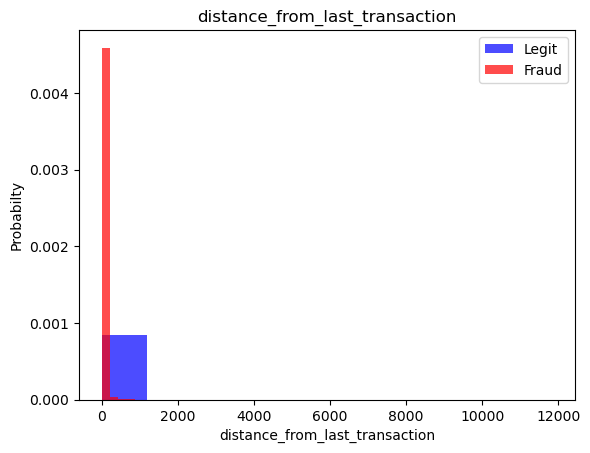

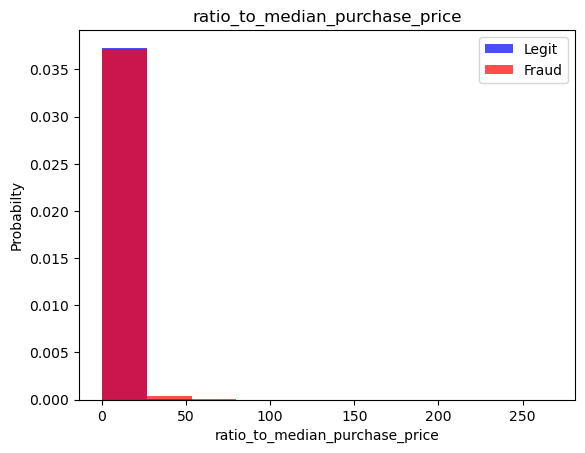

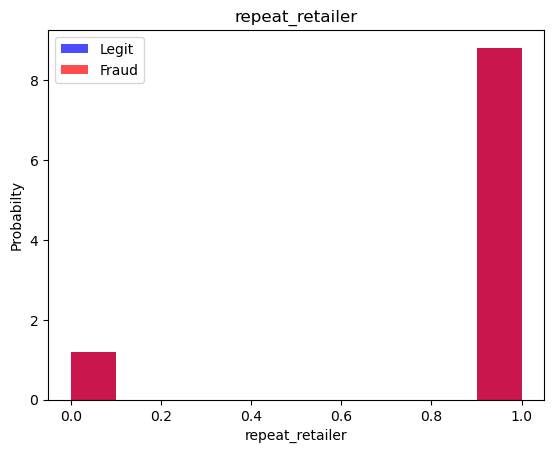

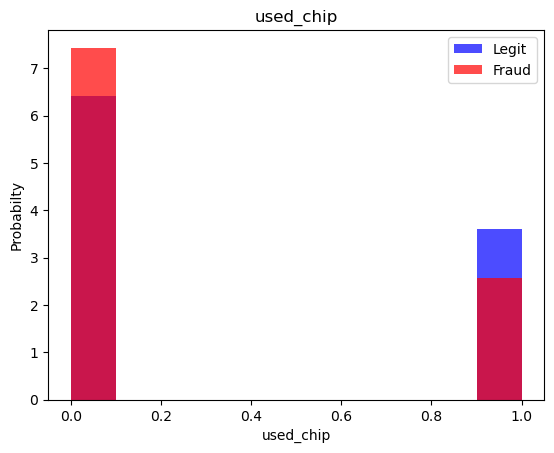

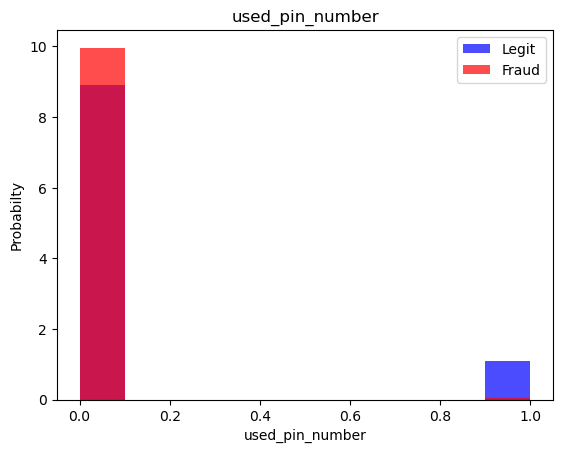

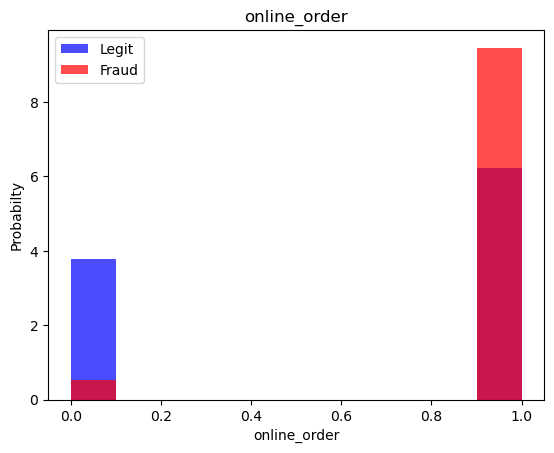

In [6]:
for label in cols :
    plt.hist(df[df['fraud'] == 0.0][label],color= 'blue',label='Legit',alpha = 0.7,density = True)
    plt.hist(df[df['fraud'] == 1.0][label],color= 'red',label='Fraud',alpha = 0.7,density = True)
    plt.title(label)
    plt.ylabel('Probabilty')
    plt.xlabel(label)
    plt.legend()
    plt.show()

We can see from this graphs some essential features of credit card fraud 
e.g
distance from home the higher the probability the lower the chances of fraud

In [7]:
from sklearn.model_selection import train_test_split
# iloc : takes a slice of the dataframe
X = df.iloc[: , :-1]
y = df.iloc[: , -1]



X_train, X_test , y_train , y_test = train_test_split(X,y, random_state=42)



## Decision Tree Clasifier


In [8]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [9]:
dtc.fit(X=X_train , y= y_train)

DecisionTreeClassifier()

In [10]:
y_pred = dtc.predict(X_test)

In [11]:
from sklearn.metrics import classification_report

In [12]:
print(classification_report(y_pred=y_pred,y_true= y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    228258
         1.0       1.00      1.00      1.00     21742

    accuracy                           1.00    250000
   macro avg       1.00      1.00      1.00    250000
weighted avg       1.00      1.00      1.00    250000



In [13]:
import pickle 
pickle_out = open("DTCclassifier.pkl","wb")
pickle.dump(dtc,pickle_out)
pickle_out.close()

Pretty good performance but lets not forget how really imbalanced the dataset is.Lots of 0's but less 1's . 

## K-nearest neighhbours

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [15]:
knn.fit(X= X_train,y= y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
y_pred = knn.predict(X_test)

In [17]:
print(classification_report(y_true=y_test,y_pred= y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    228258
         1.0       0.89      0.94      0.91     21742

    accuracy                           0.98    250000
   macro avg       0.94      0.96      0.95    250000
weighted avg       0.98      0.98      0.98    250000



Okay for the most of the legit transactions it did well but for the fraud transactions it didnt do so well with 94% recall.
Overally not bad 94% :)

## Naive Bayes

I like this model because I can actually use the formula in my statistics for A level so I can closely follow what happens in each decision the algorithm makes.

It uses conditional probability to calculate the likelyhood of the event happening given that the other event might have alredy happened.

Thnak you Mr Makuvise.


In [18]:
from sklearn.naive_bayes import GaussianNB
gnb =GaussianNB()

In [19]:
gnb.fit(X = X_train , y= y_train)

GaussianNB()

In [20]:
y_pred = gnb.predict(X = X_test)

In [21]:
print(classification_report(y_pred= y_pred, y_true= y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97    228258
         1.0       0.79      0.61      0.69     21742

    accuracy                           0.95    250000
   macro avg       0.88      0.80      0.83    250000
weighted avg       0.95      0.95      0.95    250000



So yeah the model didnt do so well for my favourite model , total accuracy of 95%

## Random Tree Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [23]:
rfc.fit(X=X_train , y = y_train)

RandomForestClassifier()

In [24]:
y_pred = rfc.predict(X= X_test)
print(f"Confusion Matrix \n {confusion_matrix(y_true= y_test, y_pred=y_pred)}")
print("-"*100)
print(f"Classifcation Report \n {classification_report(y_pred=y_pred ,y_true =y_test)}")

Confusion Matrix 
 [[228258      0]
 [     2  21740]]
----------------------------------------------------------------------------------------------------
Classifcation Report 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    228258
         1.0       1.00      1.00      1.00     21742

    accuracy                           1.00    250000
   macro avg       1.00      1.00      1.00    250000
weighted avg       1.00      1.00      1.00    250000



This really good its competing with the decision tree from the first one 

## Taking input from the user

### Note :
#### This is supposed to be automatic like there should be an api getting all the data in the background but unfortunately I cant get an Open API key so sorry :)

In [25]:
print("Please enter details for the following features")
features = X.columns.to_list()
user_input = []
for feature in features :
    value = float(input(f"Please enter value for : {feature}" ))
    user_input.append(value)

prediction = dtc.predict([user_input])

if prediction == 0.0 :
    print("Predicted class is okay, safe to transfer money 😊😍")

else:
    print("I strongly advise that you dont transfer monry on this site \n Preidicted Fraud ⛔🚫")

Please enter details for the following features


ValueError: could not convert string to float: ''

In [ ]:
print(prediction)

[0.]


In [27]:
count = (df["fraud"] == 1.0).count()
count

1000000